In [15]:
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [16]:
DATADIR = r'C:\Users\adith\Documents\Facial_Acne_Classification\data'
CATEGORIES = ["stage1","stage2","stage3","stage4"]
IMG_SIZE=100

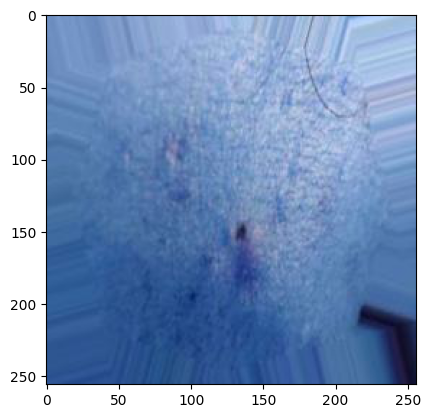

In [17]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [18]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()    

In [19]:
lenofimage = len(training_data)

In [20]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [21]:
X = X/255.0
y=np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [23]:
model = KNeighborsClassifier(n_neighbors=4, n_jobs=1)

In [24]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=4)

In [25]:
y2 = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y2))

Accuracy: 0.5069444444444444


In [27]:
from sklearn.metrics import classification_report
print("Classification Report",classification_report(y_test,y2))

Classification Report               precision    recall  f1-score   support

           0       0.36      0.69      0.47        36
           1       0.54      0.42      0.47        36
           2       0.61      0.45      0.52        38
           3       0.89      0.47      0.62        34

    accuracy                           0.51       144
   macro avg       0.60      0.51      0.52       144
weighted avg       0.59      0.51      0.52       144

